<a href="https://colab.research.google.com/github/santiagomvc/content/blob/main/Introduction_to_ML_and_Generative_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before we start


To open this code in Google Colab and run it in the browser:

* Go to https://colab.research.google.com
* Open the Github tab, and past the Github link to the notebook

In [ ]:
#@title Install required packages
!pip install transformers datasets openai

In [27]:
#@title Import required libraries and set the API keys
import pandas as pd
from sklearn.datasets import load_iris

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from PIL import Image
import requests
from io import BytesIO

from transformers import AutoImageProcessor, ResNetForImageClassification
import torch
from datasets import load_dataset
import matplotlib.pyplot as plt

from transformers import pipeline

import openai


# Introduction

![title](https://github.com/openstates/hackathon-2023/blob/main/images/nlp.png?raw=1)

# The Old Way

In [3]:
iris_ds = load_iris(as_frame=True) # the iris dataset is now a Pandas DataFrame
iris = pd.concat([iris_ds.data, iris_ds.target], axis=1)
iris.columns = ['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm',	'Species']

iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

In [4]:
iris["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

<Figure size 1000x10000 with 0 Axes>

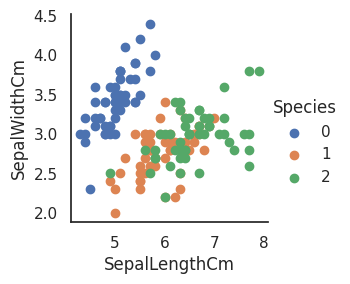

In [5]:
plt.figure(figsize=(10,100))
sns.FacetGrid(iris, hue="Species") \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

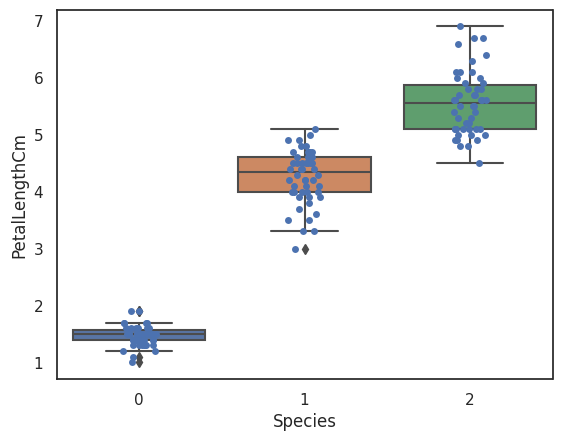

In [6]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

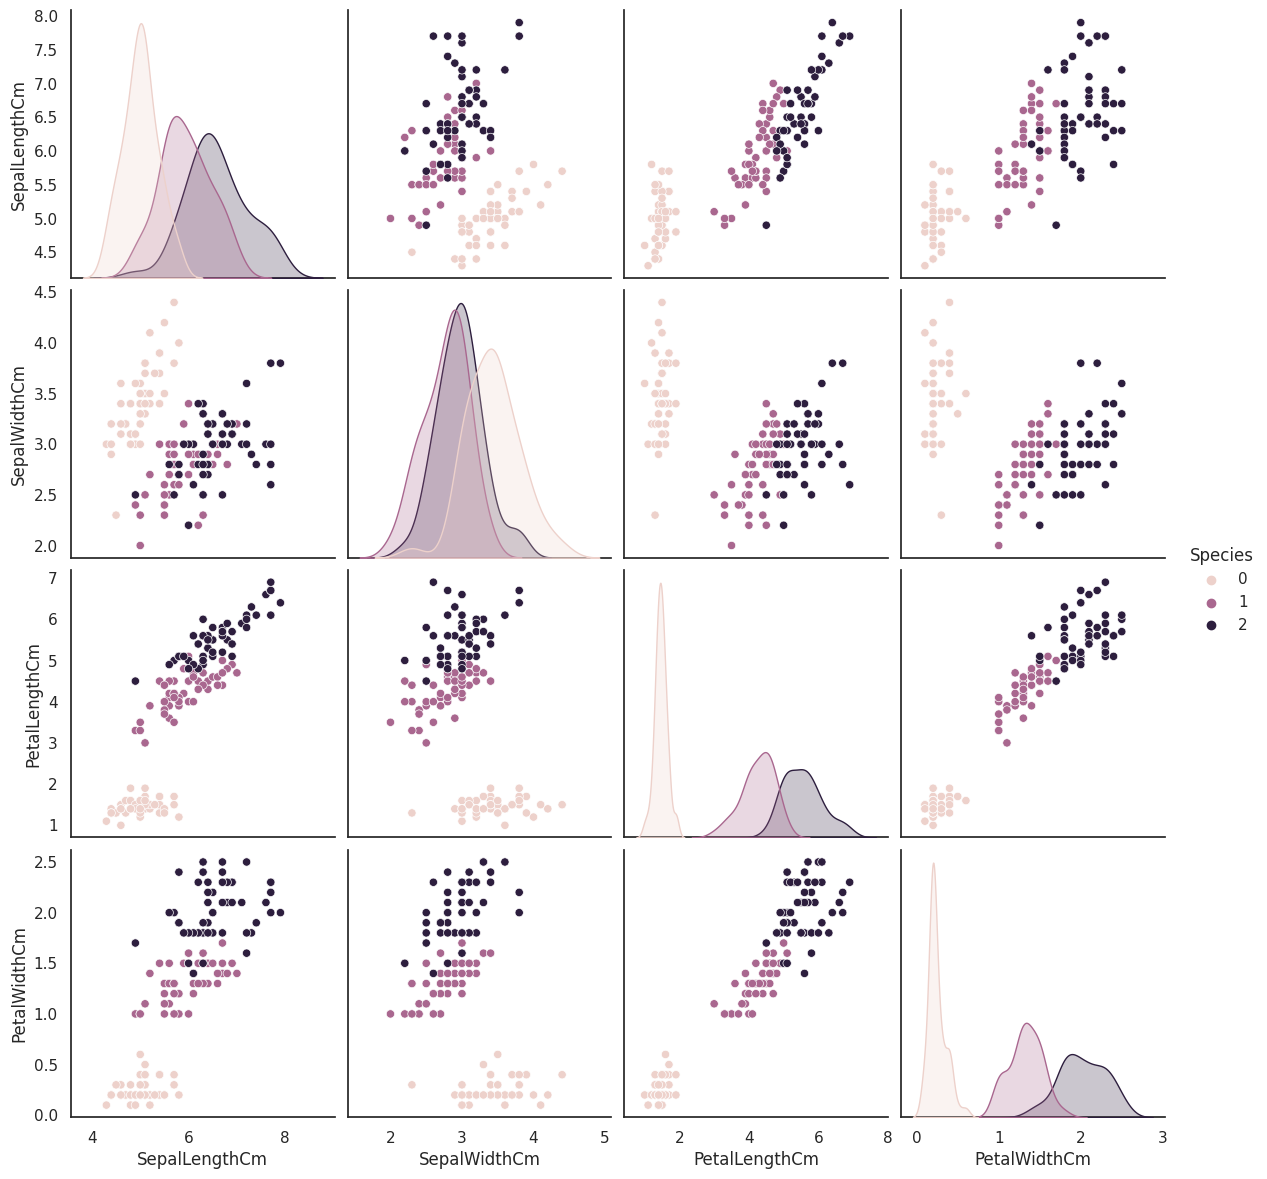

In [7]:
sns.pairplot(iris, hue="Species", size=3)

<Figure size 1000x10000 with 0 Axes>

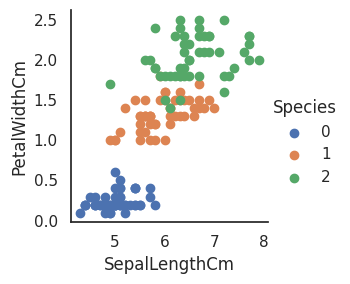

In [8]:
plt.figure(figsize=(10,100))
sns.FacetGrid(iris, hue="Species") \
   .map(plt.scatter, "SepalLengthCm", "PetalWidthCm") \
   .add_legend()

# Why Machine Learning

In [9]:
wine_ds = load_wine(as_frame=True)
wine = pd.concat([wine_ds.data, wine_ds.target], axis=1)
wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [10]:
wine["target"].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

<Figure size 1000x10000 with 0 Axes>

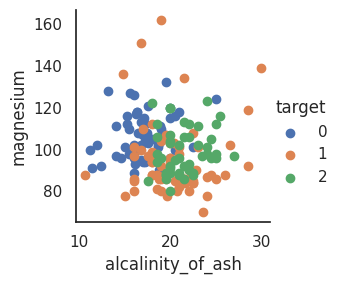

In [11]:
plt.figure(figsize=(10,100))
sns.FacetGrid(wine, hue="target") \
   .map(plt.scatter, "alcalinity_of_ash", "magnesium") \
   .add_legend()

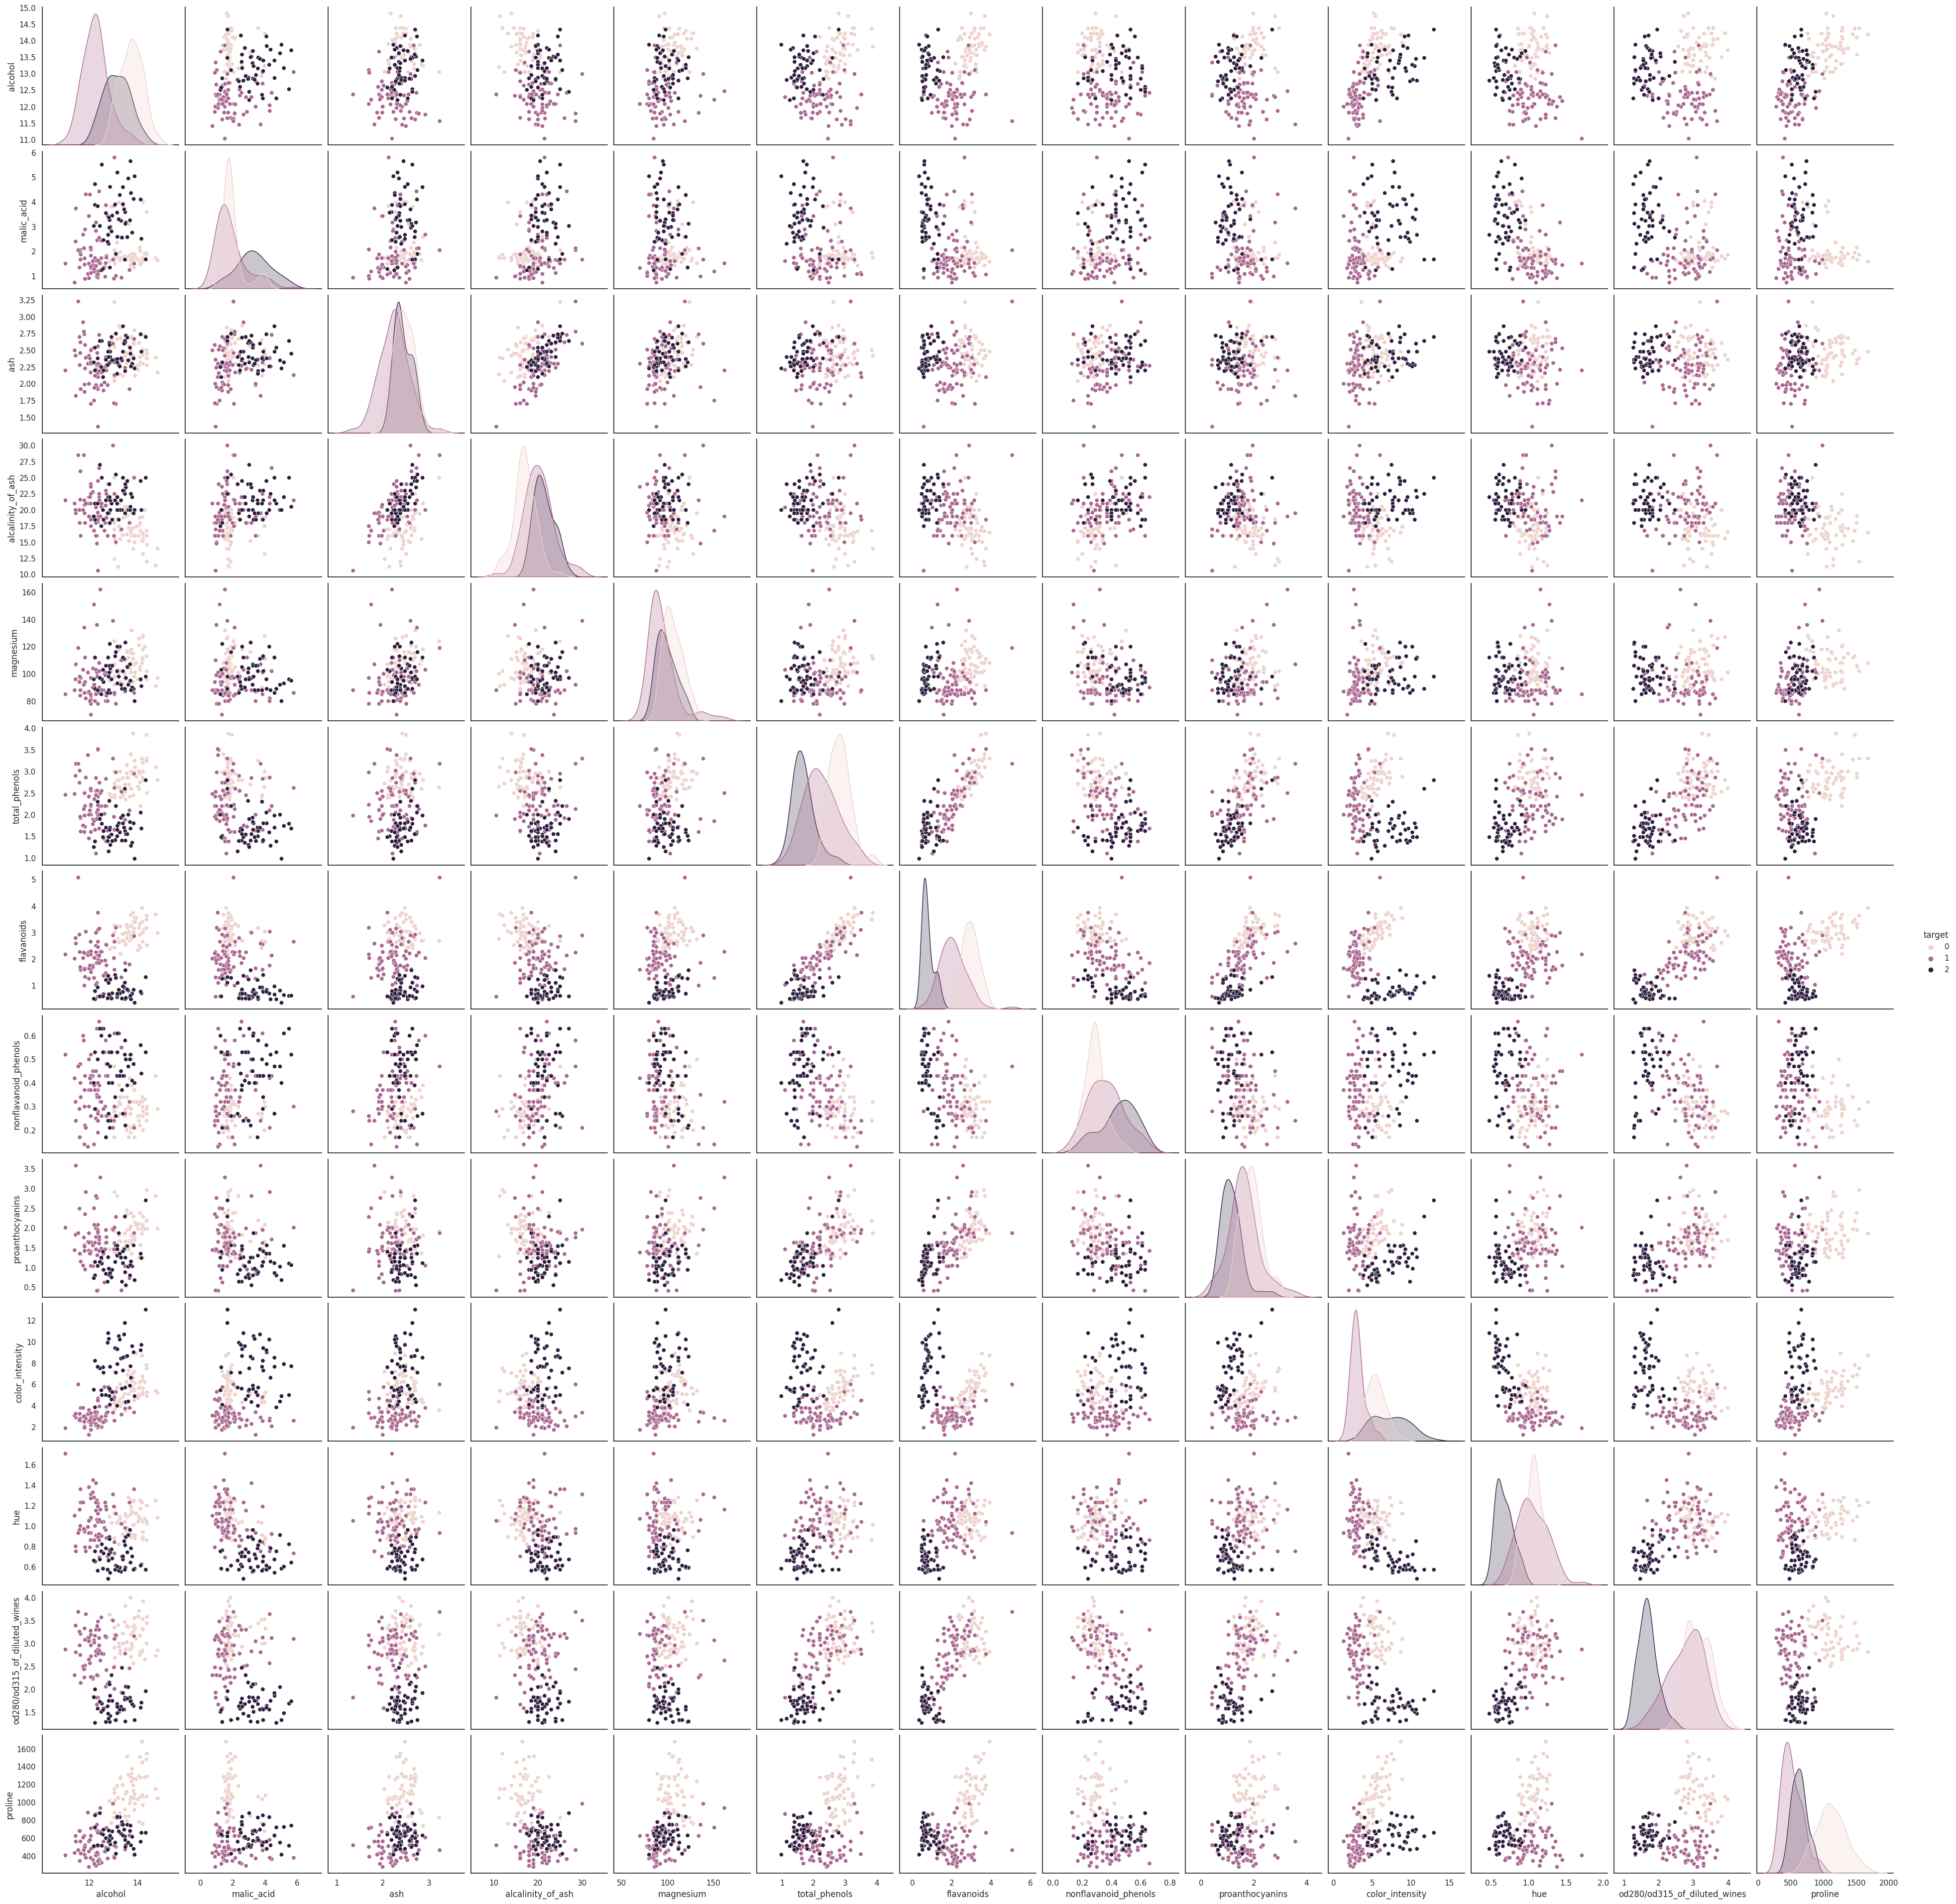

In [25]:
## sns.pairplot(wine, hue="target", size=3)

### Where ML Comes in
![](https://kislayverma.com/wp-content/uploads/2021/06/Screenshot-2021-06-17-at-11.31.04-PM.png)

In [13]:
wine_ds.data.sample(5)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
110    11.46        3.74  1.82               19.5      107.0           3.18   
28     13.87        1.90  2.80               19.4      107.0           2.95   
33     13.76        1.53  2.70               19.5      132.0           2.95   
145    13.16        3.57  2.15               21.0      102.0           1.50   
52     13.82        1.75  2.42               14.0      111.0           3.88   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
110        2.58                  0.24             3.58             2.90  0.75   
28         2.97                  0.37             1.76             4.50  1.25   
33         2.74                  0.50             1.35             5.40  1.25   
145        0.55                  0.43             1.30             4.00  0.60   
52         3.74                  0.32             1.87             7.05  1.01   

     od280/od315_of_diluted_wines  proline  
110                          2.81    562.0  
28                           3.40    915.0  
33                           3.00   1235.0  
145                          1.68    830.0  
52                           3.26   1190.0

In [14]:
wine_ds.target.sample(5)

122    1
96     1
91     1
119    1
149    2
Name: target, dtype: int64

## Decision Tree Classifier
![image](https://cdn.educba.com/academy/wp-content/uploads/2019/11/Tree-in-Machine-Learning.png)

In [15]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(wine_ds.data, wine_ds.target)
clf

DecisionTreeClassifier(max_depth=3)

In [16]:
clf.predict_proba(wine_ds.data.sample(5))

array([[0.03174603, 0.96825397, 0.        ],
       [0.03174603, 0.96825397, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.03174603, 0.96825397, 0.        ],
       [0.        , 0.        , 1.        ]])

In [17]:
accuracy_score(wine_ds.target, clf.predict(wine_ds.data))

0.9775280898876404

# Machine Learning - It's all about learning

### Impurity Reduction
![](https://miro.medium.com/v2/resize:fit:1400/1*zMu0UClotNXljrjqmyRIHA.png)

### Gradient Descent
![](https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_04-GradientDescent-WHITEBG_0.png)


## What are we learning

### Linear Regression
![](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*jt-pyQQ7bgL2lyganse0nQ.png)

### Trees
![](https://miro.medium.com/v2/resize:fit:663/1*xGsYc6aXehD7lyoLEn-mMA.png)

[Text(0.5, 0.875, 'x[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.25, 0.625, 'x[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.125, 0.375, 'x[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.0625, 0.125, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.1875, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.375, 0.375, 'x[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.4375, 0.125, 'gini = 0.061\nsamples = 63\nvalue = [2, 61, 0]'),
 Text(0.75, 0.625, 'x[6] <= 2.165\ngini = 0.265\nsamples = 67\nvalue = [57, 4, 6]'),
 Text(0.625, 0.375, 'x[10] <= 0.803\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.875, 0.375, 'x[4] <= 135.5\ngini = 0.065\nsamples = 59\

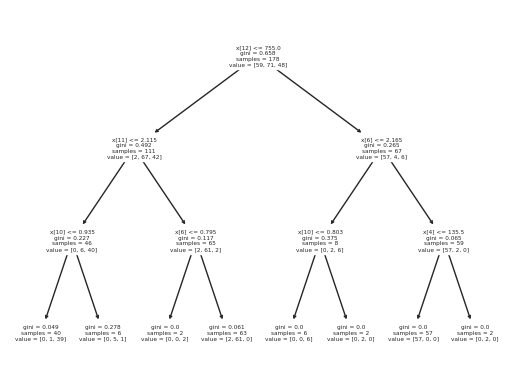

In [18]:
plot_tree(clf)

In [ ]:
#@title Important ideas in ML learning

# ## Bias-Variance Trade Off in Learning
# ![image](https://miro.medium.com/v2/resize:fit:1400/1*9hPX9pAO3jqLrzt0IE3JzA.png)

# ## No Free Lunch Theorem
# ![image.png](https://media.geeksforgeeks.org/wp-content/uploads/20210625140508/AlgorithmA.png)

# ## Lots of ML Models
# ![image.png](https://scikit-learn.org/stable/_static/ml_map.png)

# The arrival of deep learning

## Model Architectures
![main](https://www.researchgate.net/publication/353783898/figure/fig3/AS:1055126257164288@1628573111029/Illustrations-of-machine-learning-models-Details-about-each-model-can-be-found-in.png)

## Better understanding of how the models work
![main](https://eliaszwang.com/paper-reviews/scaling-laws-neural-lm/featured.png)

## Semi Supervised Learning allow us to build huge models

### Text
![main](https://editor.analyticsvidhya.com/uploads/782781__MrDp6w3Xc-yLuCTbco0xw.png)

### Images
![main](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-24-at-11.23.09-PM.png)

  0%|          | 0/1 [00:00<?, ?it/s]

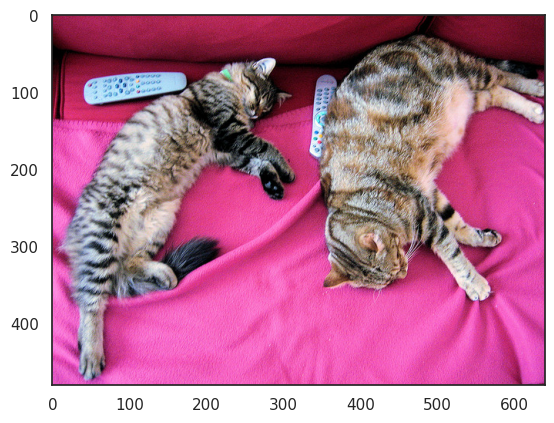

In [19]:
dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]
plt.imshow(image)

In [20]:
processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

inputs = processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(f'Prediction: {model.config.id2label[predicted_label]}')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Prediction: tiger cat


In [21]:
print(model)

ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64

# What's Generative AI

## Models (usually ML) able to create content
![](https://www.mckinsey.com/~/media/mckinsey/featured%20insights/mckinsey%20explainers/what%20is%20generative%20ai/generative-ai-1219474321-hero-1536x864-v2.jpg?cq=50&mw=1180&cpy=Center)

# How Generative AI works

## Pre-Trained Large Models
![](https://huggingface.co/blog/assets/33_large_language_models/01_model_size.jpg)

## Conditional Probability
![main](https://www.researchgate.net/publication/286242934/figure/fig33/AS:669990550265871@1536749603968/Venn-diagram-to-aid-understanding-of-conditional-probability.ppm)



In [22]:
unmasker = pipeline('fill-mask', model='xlm-roberta-large')
unmasker("Hola mi nombre es Santiago, cual es tu <mask>")

[{'score': 0.31229889392852783,
  'token': 11610,
  'token_str': 'nombre',
  'sequence': 'Hola mi nombre es Santiago, cual es tu nombre'},
 {'score': 0.23911195993423462,
  'token': 32,
  'token_str': '?',
  'sequence': 'Hola mi nombre es Santiago, cual es tu?'},
 {'score': 0.042335573583841324,
  'token': 2,
  'token_str': '</s>',
  'sequence': 'Hola mi nombre es Santiago, cual es tu'},
 {'score': 0.028929004445672035,
  'token': 705,
  'token_str': '?',
  'sequence': 'Hola mi nombre es Santiago, cual es tu?'},
 {'score': 0.018388884142041206,
  'token': 4767,
  'token_str': '??',
  'sequence': 'Hola mi nombre es Santiago, cual es tu??'}]

# Generative AI Applications

Set your own openai key. To learn more visit https://openai.com/blog/openai-api

In [ ]:
openai.api_key = ''

## Natural Language

In [23]:
model = 'gpt-3.5-turbo'
messages = [
    {"role": "system", "content": 'Eres un guia turistico'},
    {"role": "user", "content": 'Cuentame de los sitios turisticos del Peru'}
]

response = openai.ChatCompletion.create(
    model=model,
    messages=messages,
    temperature=0
)
out = response['choices'][0]['message']['content']
print(out)

¡Por supuesto! El Perú es un país lleno de maravillas naturales, culturales e históricas. Aquí te presento algunos de los sitios turísticos más populares:

1. Machu Picchu: Esta ciudadela inca es uno de los destinos turísticos más populares del mundo. Se encuentra en la cima de una montaña en la región de Cusco y es considerada una de las siete maravillas del mundo moderno.

2. El Lago Titicaca: Este lago es el más alto del mundo y se encuentra en la frontera entre Perú y Bolivia. Es un lugar sagrado para los incas y hogar de varias islas flotantes habitadas por los Uros.

3. La ciudad de Cusco: Esta ciudad fue la capital del Imperio Inca y es conocida por su arquitectura colonial española y sus ruinas incas. Es un lugar lleno de historia y cultura.

4. La Reserva Nacional de Paracas: Esta reserva natural se encuentra en la costa sur del Perú y es hogar de una gran variedad de especies marinas y aves. También es conocida por sus formaciones rocosas y playas de arena blanca.

5. La ciud

Images

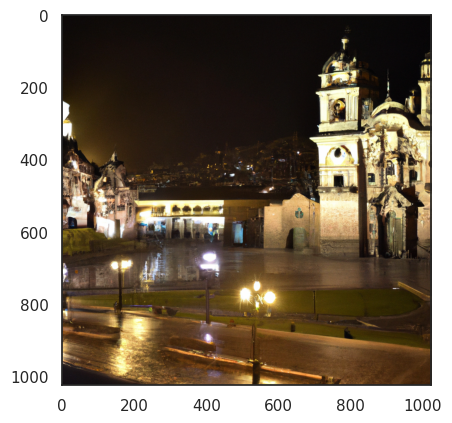

In [24]:
response = openai.Image.create(
  prompt="Peru at nigth",
  n=1,
  size="1024x1024"
)
image_url = response['data'][0]['url']

response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)

Audio, Video, etc.

Music Example: https://huggingface.co/spaces/facebook/MusicGen

# Business Applications (and risks) of Generative AI

## Chatbot/Demo
https://chat.openai.com

## Content Creation
https://app.runwayml.com/

## Artificial Intern
https://ai.pluralpolicy.com